In [452]:
import torch
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import models
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import itertools

# Tensors

Tensor is a multi-dimensional generalization of a matrix, allowing us to have multidimensional arrays of structured data. We can do mathematical operations on them without knowing what each of the dimensions represents semantically.

They can also be simpler structures like vectors.

![Tensors](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

### Tensor operations

### Construction

```python
torch.tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) → Tensor
```

Constructs a tensor with data.

Parameters:
* data (array_like) – Initial data for the tensor. Can be a list, tuple, NumPy ndarray, scalar, and other types.

Keyword arguments:
* dtype (torch.dtype, optional) – the desired data type of returned tensor. Default: if None, infers data type from data.

* device (torch.device, optional) – the desired device of returned tensor. Default: if None, uses the current device for the default tensor type (see torch.set_default_tensor_type()). device will be the CPU for CPU tensor types and the current CUDA device for CUDA tensor types.

* requires_grad (bool, optional) – If autograd should record operations on the returned tensor. Default: False.

* pin_memory (bool, optional) – If set, returned tensor would be allocated in the pinned memory. Works only for CPU tensors. Default: False.

In [2]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [3]:
torch.tensor([0, 1])

tensor([0, 1])

In [4]:
torch.tensor([[0.11111, 0.222222, 0.3333333]],
    dtype=torch.float64,
    device=torch.device('cuda:0'))

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [5]:
torch.tensor(3.14159)

tensor(3.1416)

In [6]:
torch.tensor([])

tensor([])

In [7]:
x = torch.tensor([1,2,3,4],dtype=torch.float32)
x.requires_grad_(requires_grad=True)
y = torch.tensor([1, 1, 1, 1],dtype=torch.float32,requires_grad=True) # tensor y 
z = x * y
z = z.mean()
z.backward() 
x.grad

tensor([0.2500, 0.2500, 0.2500, 0.2500])

### Concatenation

```python
torch.cat(tensors, dim=0, *, out=None) → Tensor
```

Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty.


Parameters:
* tensors (sequence of Tensors) – any python sequence of tensors of the same type. Non-empty tensors provided must have the same shape, except in the cat dimension.

* dim (int, optional) – the dimension over which the tensors are concatenated

Keyword arguments:
* out (Tensor, optional) – the output tensor.

In [8]:
x = torch.randn(2, 3)
x

tensor([[-0.5246,  1.6271, -0.0613],
        [-0.0924, -0.2189,  0.3934]])

In [9]:
torch.cat((x, x, x), 0)

tensor([[-0.5246,  1.6271, -0.0613],
        [-0.0924, -0.2189,  0.3934],
        [-0.5246,  1.6271, -0.0613],
        [-0.0924, -0.2189,  0.3934],
        [-0.5246,  1.6271, -0.0613],
        [-0.0924, -0.2189,  0.3934]])

In [10]:
a = torch.ones(2,2)
b = torch.zeros(1,2)
torch.cat((a, b))

tensor([[1., 1.],
        [1., 1.],
        [0., 0.]])

### Reshape

```python
torch.reshape(input, shape) → Tensor
```

Returns a tensor with the same data and number of elements as input, but with the specified shape. When possible, the returned tensor will be a view of input. Otherwise, it will be a copy. Contiguous inputs and inputs with compatible strides can be reshaped without copying, but you should not depend on the copying vs. viewing behavior.

Parameters:
* input (Tensor) – the tensor to be reshaped

* shape (tuple of python:ints) – the new shape

In [11]:
a = torch.arange(4.)
a

tensor([0., 1., 2., 3.])

In [12]:
torch.reshape(a, (2, 2))

tensor([[0., 1.],
        [2., 3.]])

In [13]:
b = torch.tensor([[0, 1], [2, 3]])
torch.reshape(b, (-1,))

tensor([0, 1, 2, 3])

### Unbind

```python
torch.unbind(input, dim=0) → seq
```

Removes a tensor dimension.

Parameters:
* input (Tensor) – the tensor to unbind
* dim (int) – dimension to remove

In [14]:
torch.unbind(torch.tensor([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]]))

(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9]))

In [15]:
a, b = torch.unbind(torch.tensor([[1, 2, 3],[3,4,5]]))
a, b

(tensor([1, 2, 3]), tensor([3, 4, 5]))

### Clamp

```python
torch.clamp(input, min=None, max=None, *, out=None) → Tensor
```

Clamps all elements in input into the range [ min, max ]. Letting min_value and max_value be min and max, respectively, this returns:

$ y_i = min(max(x_i, min\_value_i), max\_value_i) $

If min is None, there is no lower bound. Or, if max is None there is no upper bound.

Parameters:
* input (Tensor) – the input tensor.
* min (Number or Tensor, optional) – lower-bound of the range to be clamped to
* max (Number or Tensor, optional) – upper-bound of the range to be clamped to

Keyword arguments:
* out (Tensor, optional) – the output tensor.

In [16]:
a = torch.randn(4)
a

tensor([-0.4147, -0.5368, -0.8001,  0.6387])

In [17]:
torch.clamp(a, min=-0.5, max=0.5)

tensor([-0.4147, -0.5000, -0.5000,  0.5000])

In [18]:
a = torch.randn(5)
b = torch.empty_like(a)
a, b

(tensor([-0.7780, -1.0336, -1.1450,  0.3209,  0.3827]),
 tensor([0., 0., 0., 0., 0.]))

In [19]:
torch.clamp(a, 0.2, 0.6, out=b)
b

tensor([0.2000, 0.2000, 0.2000, 0.3209, 0.3827])

# Gradients

Gradient is simply a vector listing the derivatives of a function with respect to each argument of the function.

On setting requires_grad = True, Tensors start forming a backward graph that tracks every operation applied on them to calculate the gradients using something called a dynamic computation graph.

**Backpropagation:** used to calculate the gradients of the loss keeping the input weights to later update the weights and reduce loss.

Steps for training a neural network:
* Choose architecture
* Forward propagation
* Calculate loss
* Back propgation
* Update weights

The change in the loss for a small change in an input weight is called the gradient of that weight and is calculated using backpropagation. The gradient is then used to update the weight using a learning rate to overall reduce the loss and train the neural net.


![Cost function](https://github.com/rasbt/python-machine-learning-book/raw/master/faq/closed-form-vs-gd/ball.png)

Slope of the angle of our cost function at our current location determines if we are adjusting correctly. A negative slope tells us we are headed downward, which is good because we want to find minima, while a positive slope says that our previous step has overshot our goal (moved beyond the optimal and back up the other side of the function).

Derivative is the rate of change of a function. Descent indicates going to the bottom of a cost function using these changing gradients. To obtain derivatives a process of differentiation is used.

PyTorch includes an automatic differentiation package, *autograd*.

**Autograd:** engine used to calculate derivatives. It records a graph of all the operations performed on a gradient enabled tensor and creates an acyclic graph called the dynamic computational graph.

In [20]:
dtype = torch.float

In [21]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

In [22]:
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

In [23]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

99 411.5228576660156
199 290.4224853515625
299 205.8677978515625
399 146.78692626953125
499 105.47752380371094
599 76.574951171875
699 56.340126037597656
799 42.165260314941406
899 32.22978210449219
999 25.262008666992188
1099 20.372968673706055
1199 16.94082260131836
1299 14.530284881591797
1399 12.836532592773438
1499 11.645918846130371
1599 10.808637619018555
1699 10.21962833404541
1799 9.805122375488281
1899 9.513321876525879
1999 9.307836532592773


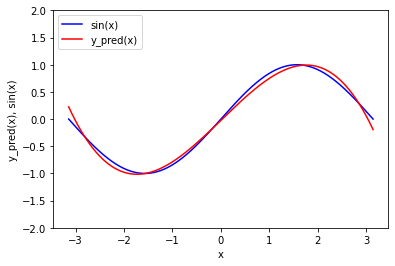

In [24]:
x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)
y_pred = a.item() + b.item()*x + c.item()*x**2 + d.item()*x**3

plt.ylim(-2,2)
plt.plot(x, y, "-b", label="sin(x)")
plt.plot(x, y_pred, "-r", label="y_pred(x)")
plt.xlabel("x")
plt.ylabel("y_pred(x), sin(x)")
plt.legend(loc="upper left")

# Neural network in Keras

In [25]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Dropout, MaxPooling2D, AveragePooling2D, Flatten, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist, cifar10
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [26]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:08:00.0, compute capability: 6.1



## Load Data

In [27]:
epochS=5
batch=128
lr0=1e-3

In [28]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

shapeI=trainX.shape[1:4]
ile_klas=trainY.shape[1]  #ile_klas

## Define model

Models in Keras are defined as a sequence of layers.

In [29]:
#feature extraction
model=Sequential()
model.add(Input(shape=shapeI))
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation('relu'))

#klasyfikator
model.add(Flatten())
model.add(Dense(ile_klas))
model.add(Activation('softmax'))

## Compile model

Compiling the model uses efficient numerical libraries. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In [30]:
opt = SGD(momentum=0.4, learning_rate=lr0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Fit model

Training a network means finding the best set of weights to map inputs to outputs in our dataset.

We can train or fit our model on our loaded data by calling the fit() function on the model.
Training occurs over epochs and each epoch is split into batches.
* Epoch: One pass through all of the rows in the training dataset.
* Batch: One or more samples considered by the model within an epoch before weights are updated.

In [31]:
h3 = model.fit(trainX, trainY, batch_size=batch, epochs=epochS)

Epoch 1/5
391/391 [==============================] - 5s 4ms/step - loss: 2.2238 - accuracy: 0.1831
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 2.0166 - accuracy: 0.3037
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 1.9280 - accuracy: 0.3317
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 1.8662 - accuracy: 0.3568
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 1.8418 - accuracy: 0.3656


## Evaluate model

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset.

In [32]:
loss, accuracy = model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 1.8221 - accuracy: 0.3715


## Make predictions

In [33]:
predictions = model.predict(testX)

In [34]:
nazwy = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=nazwy))

              precision    recall  f1-score   support

    airplane       0.46      0.45      0.45      1000
  automobile       0.43      0.39      0.41      1000
        bird       0.23      0.37      0.28      1000
         cat       0.33      0.12      0.18      1000
        deer       0.40      0.20      0.26      1000
         dog       0.32      0.34      0.33      1000
        frog       0.38      0.49      0.43      1000
       horse       0.42      0.36      0.39      1000
        ship       0.42      0.53      0.47      1000
       truck       0.41      0.47      0.44      1000

    accuracy                           0.37     10000
   macro avg       0.38      0.37      0.36     10000
weighted avg       0.38      0.37      0.36     10000



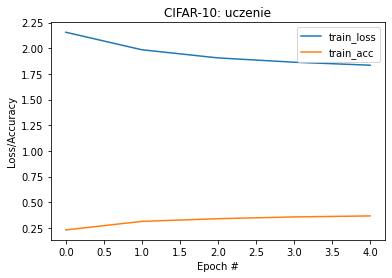

In [35]:
N = np.arange(0, epochS)
title = "CIFAR-10: uczenie"
plt.figure()
plt.plot(N, h3.history["loss"], label="train_loss")
plt.plot(N, h3.history["accuracy"], label="train_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Neural network in PyTorch

### Separating hyperplane

$ x_2 = -\dfrac{w_1}{w_2}x_1 - \dfrac{b}{w_2}$

![Hiperplane](https://i.imgur.com/LCAUjbV.png)

In [36]:
def get_separating_hyperplane(arg, w):
    return - ((w[1] / w[2]) * arg + (w[0] / w[2]))

# Perceptron

## 1. Fixed data

![Data](https://i.imgur.com/rr84OhI.png)

In [37]:
feature_data = {
    'o' : [
        [-2.0, -1.0], [-1.0, -1.5], [2.0, -2.0]
    ],
    '+' : [
        [-2.0, 1.0], [1.0, 1.0], [1.5, -0.5]
    ]
}

colors = {
    'o': 'green',
    '+': 'blue'
}

class_weights = {
    'o': -1.0,
    '+': 1.0
}

## 1.1 Fixed weights

$ w =\begin{pmatrix}
  0 \\
  1 \\
  0.5 
\end{pmatrix}$  

In [38]:
weights = [0.0, 1.0, 0.5]

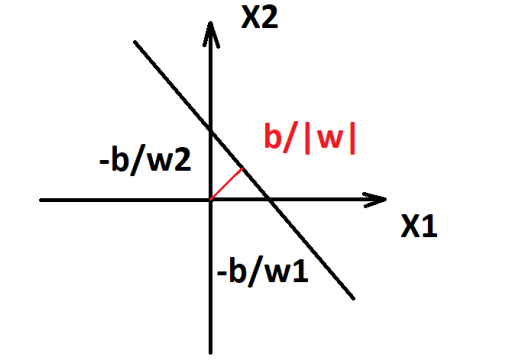

In [39]:
def x_range(data):
    min_x = 99
    max_x = -99
    
    all_values = list(itertools.chain.from_iterable(data.values()))
    for val in all_values:
        if val[0] < min_x:
            min_x = val[0]

        if val[0] > max_x:
            max_x = val[0]
    
    return (min_x, max_x)

def show_separation(data, whg, title):
    (min_x, max_x) = x_range(data)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.set_title("{}, weights={}".format(title, whg))
    ax.set_ylim(-3, 3)
    
    all_values = list(itertools.chain.from_iterable(data.values()))
    
    x_values = []
    y_values = []
    
    for x in np.linspace(min_x - 0.5, max_x + 0.5, len(all_values)):
        x_values.append(x)
        y_values.append(get_separating_hyperplane(x, whg))
    
    ax.plot(x_values, y_values, color='red', lw=3)

    for feature in data:
        for val in data[feature]:
            ax.scatter(val[0], val[1], marker=feature, color=colors[feature], s=250)

In [40]:
def classify(xi, wghts):
    return xi[0] * wghts[0] + xi[1] * wghts[1] + xi[2] * wghts[2]

def check_classification(val, cls):
    if cls == 'o' and val < 0:
        return True
    
    if cls == '+' and val >= 0:
        return True
    
    return False

def update_weights(xi, class_value, wghts, sig):
    updated_weights = []

    for i, wi in enumerate(wghts):
        updated_weights.append(wi + (sig * class_value * xi[i]))
    
    return updated_weights

def iterate_epochs(n, data, weights, sig, class_weights):
    show_separation(data, weights, "Initial hyperplane")    
    
    weights_copy = weights
    
    for i, epoch in enumerate(range(1, n + 1)):
        done = True
        for feature in data:
            for x, y in data[feature]:
                xi = (1.0, x, y)
                class_result = classify(xi, weights_copy)
                is_correct_class = check_classification(class_result, feature)
                
                if not is_correct_class:
                    weights_copy = update_weights(xi, class_weights[feature], weights_copy, sig)
                    done = False

        show_separation(data, weights_copy, "Epoch: {}".format(epoch))
        if done: break 

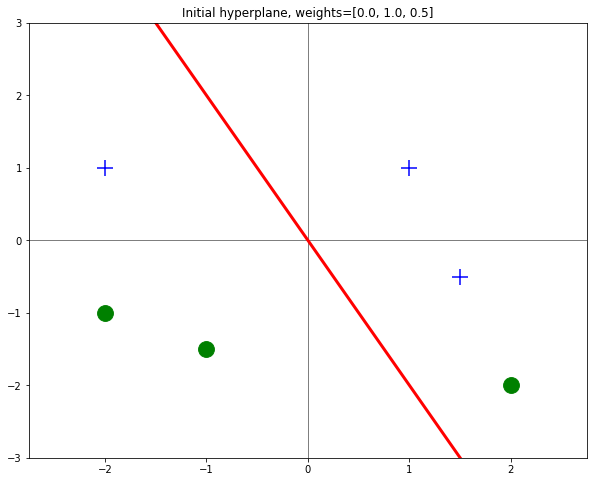

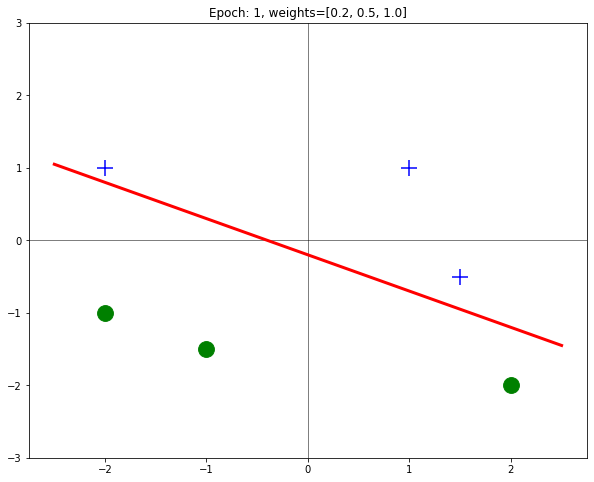

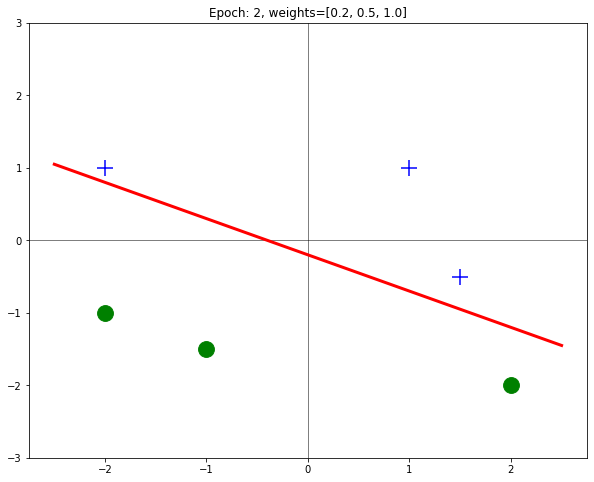

In [41]:
epochs = 10
sig = 0.2

iterate_epochs(epochs, feature_data, weights, sig, class_weights)    

## 1.2 Random weights

In [44]:
weights = np.random.uniform(low=-3, high=3, size=(3,))

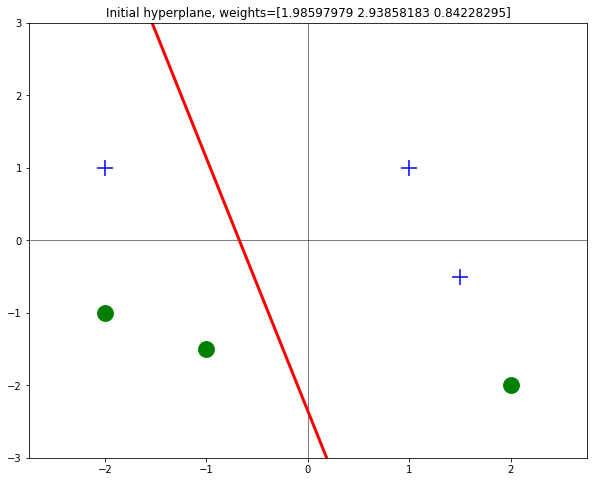

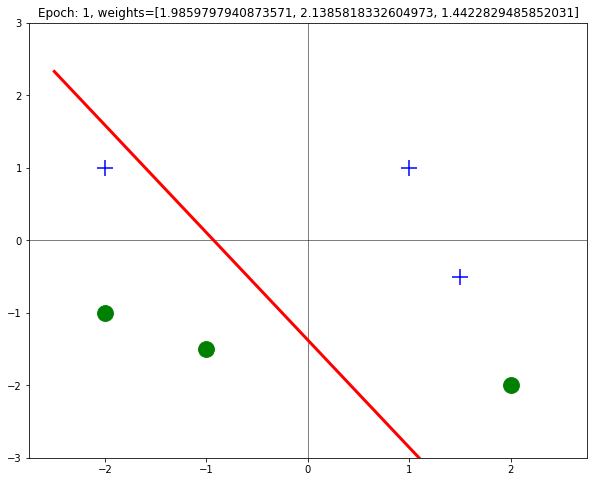

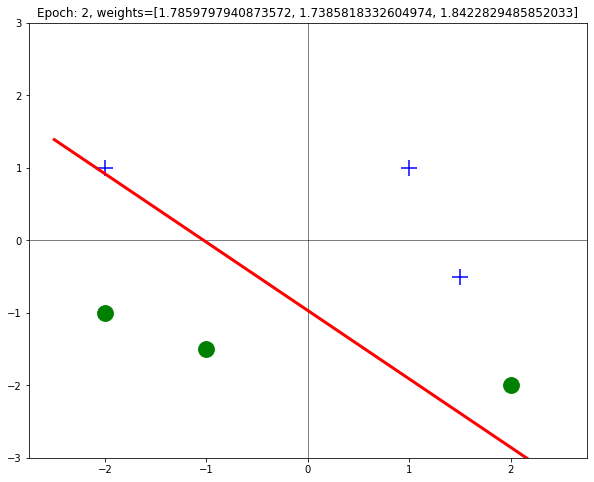

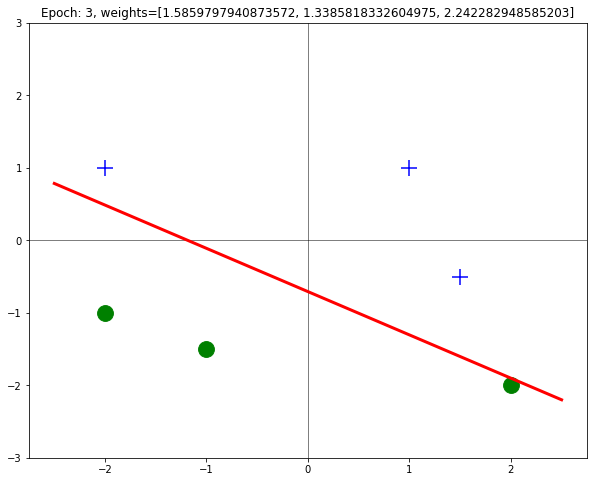

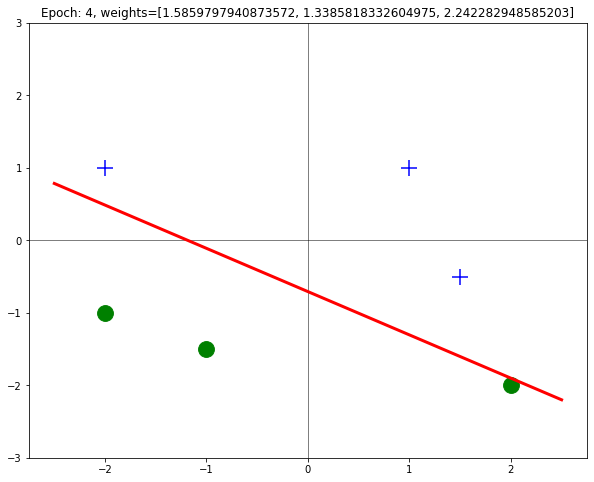

In [45]:
iterate_epochs(epochs, feature_data, weights, sig, class_weights)

## 2. Random data

In [81]:
feature_data = {
    'o' : np.random.uniform(low=-3, high=3, size=(3, 2)),
    '+' : np.random.uniform(low=-3, high=3, size=(3, 2))
}

## 2.1 Fixed weights

In [72]:
weights = [0.0, 1.0, 0.5]

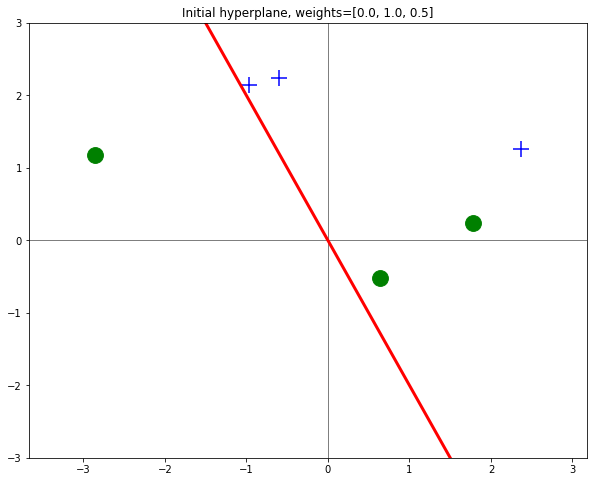

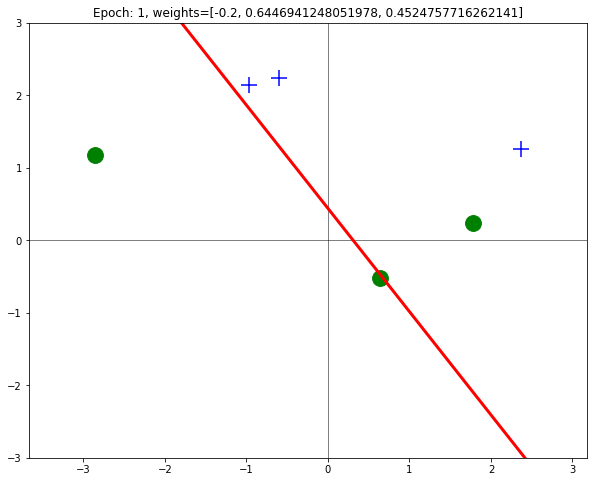

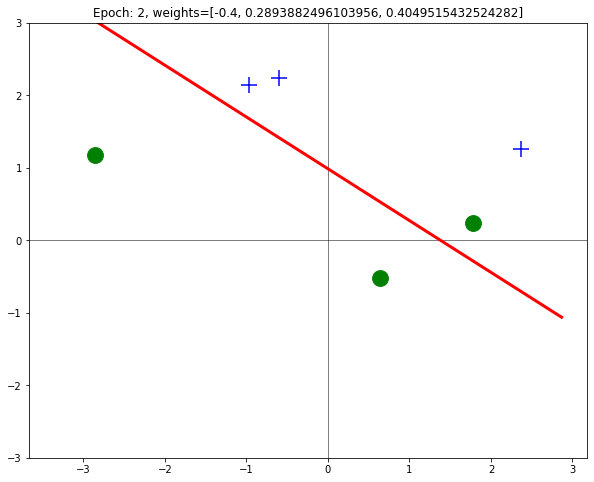

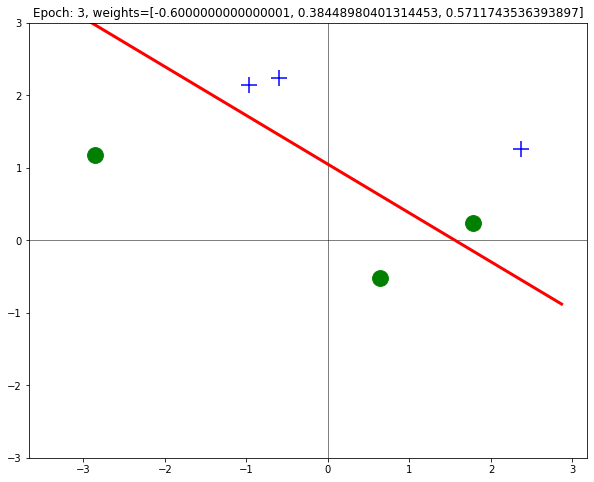

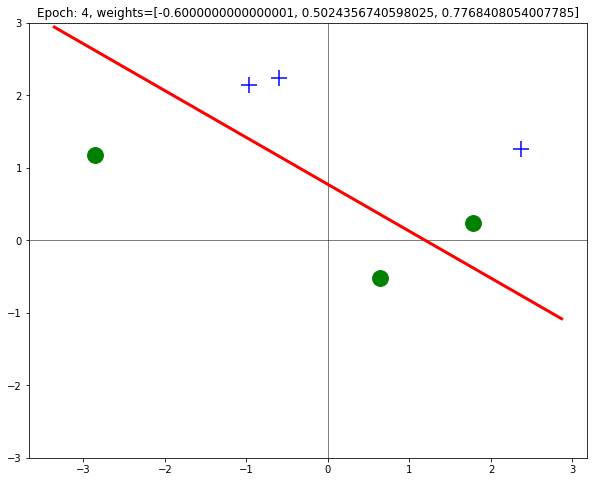

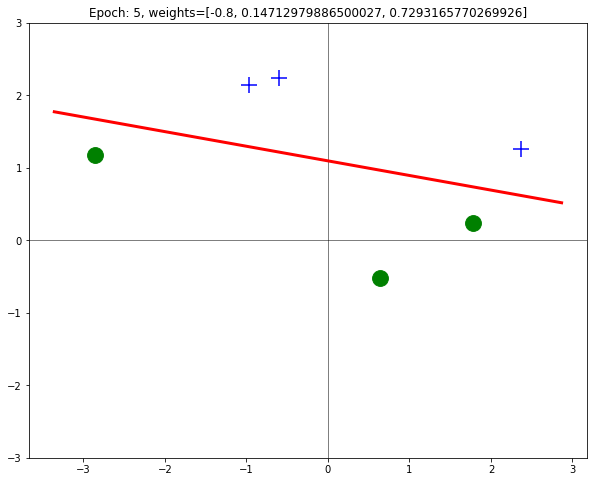

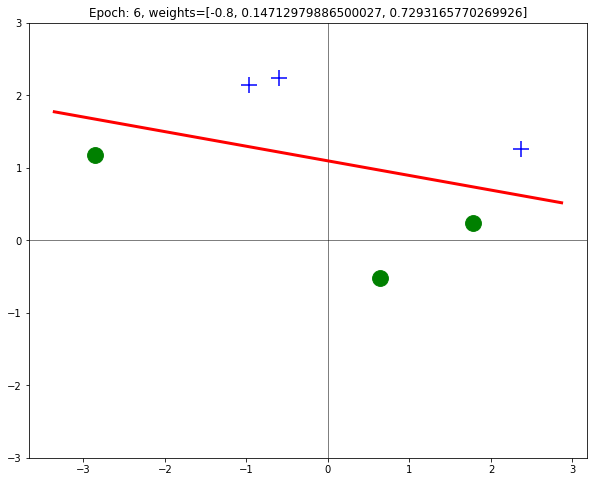

In [82]:
iterate_epochs(epochs, feature_data, weights, sig, class_weights)

## 2.2 Random weights

In [83]:
weights = np.random.uniform(low=-3, high=3, size=(3,))

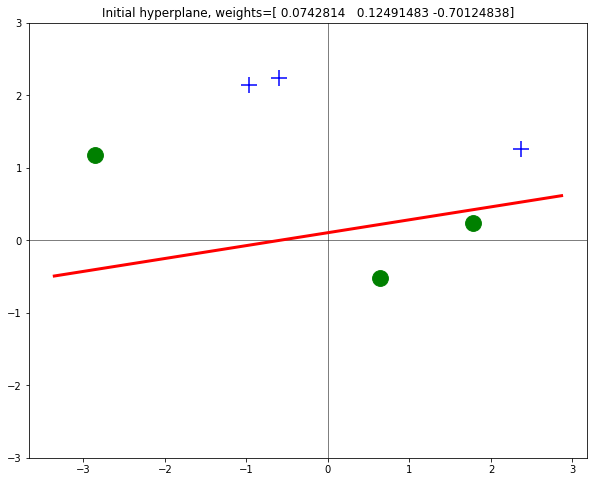

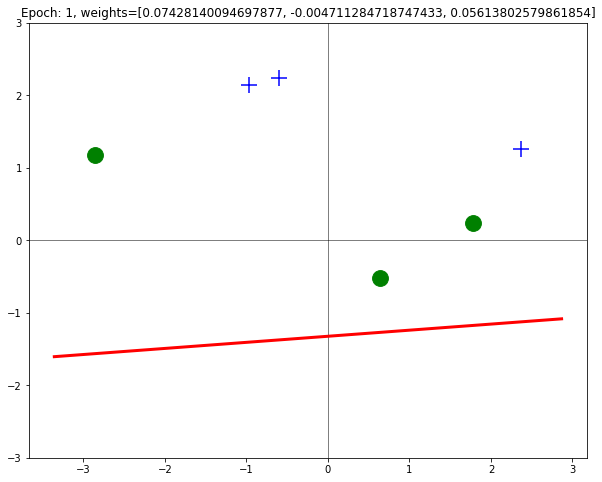

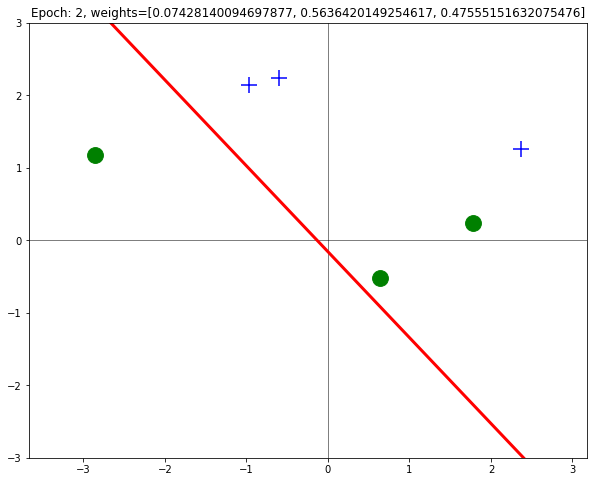

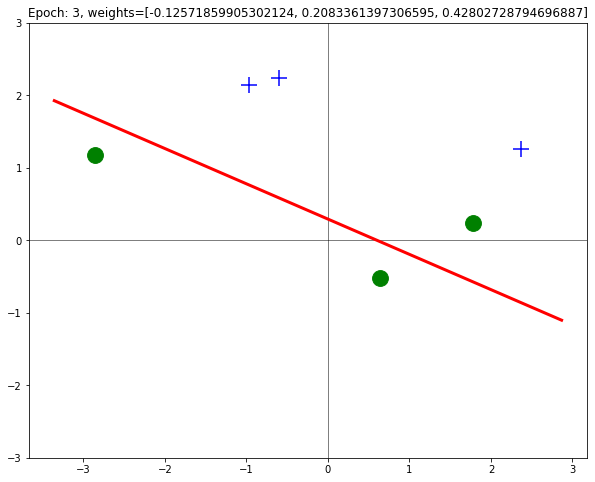

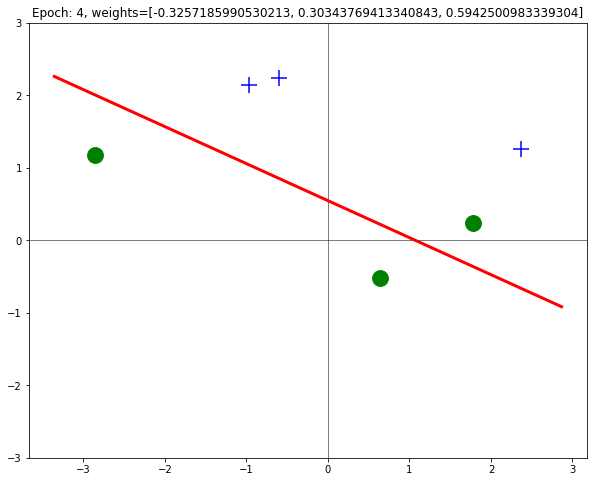

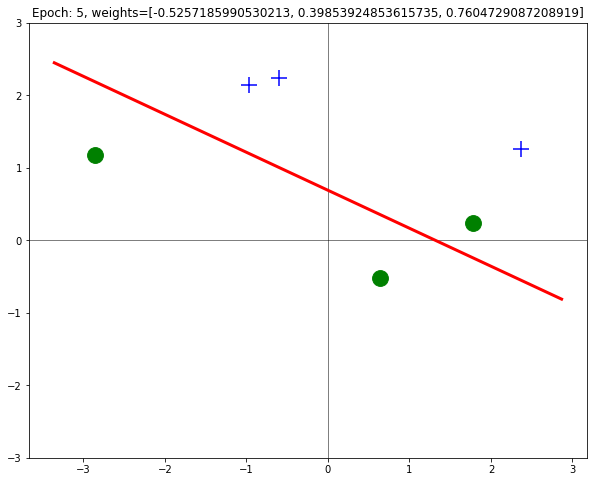

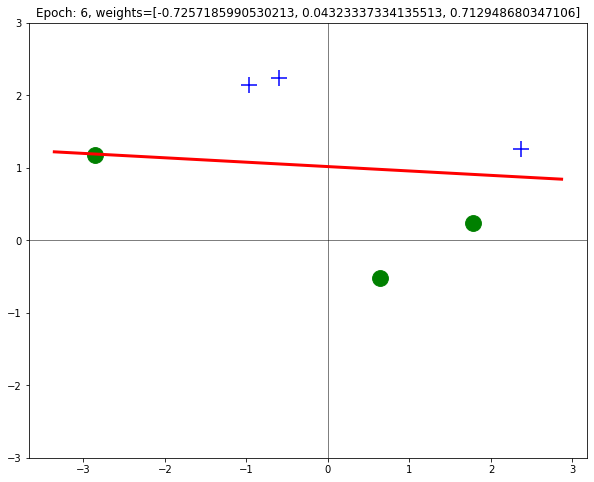

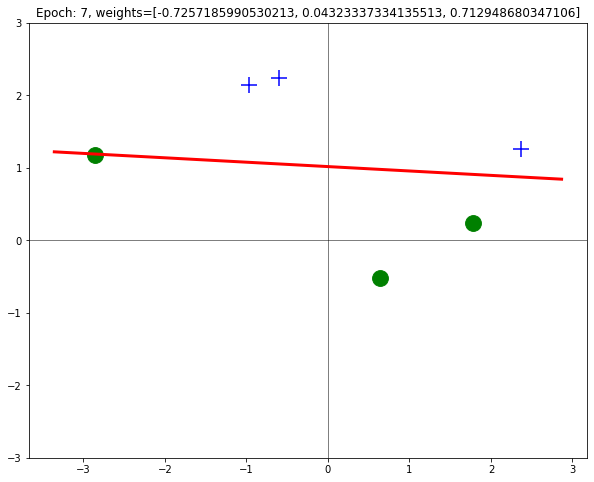

In [84]:
iterate_epochs(epochs, feature_data, weights, sig, class_weights)

# Dense perceptron

In [95]:
epochs = 10

In [461]:
def plot_loss(his):
    loss_values = his['loss']
    epochs = range(1, len(loss_values) + 1)

    line2 = plt.plot(epochs, loss_values, label='Training Loss')
    plt.setp(line2, linewidth=2.0, marker = '+', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def plot_acc(his):
    acc_values = his['accuracy']
    epochs = range(1, len(acc_values) + 1)

    line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
    plt.setp(line2, linewidth=2.0, marker = '+', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

In [97]:
model = models.Sequential()

model.add(Dense(units = 1, activation = tf.keras.activations.hard_sigmoid, input_shape = (2,)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.001), loss = tf.keras.losses.mean_squared_error, metrics = ['accuracy'])

## 1. Fixed data

In [99]:
training_data = np.array([[-2.0, -1.0], [-1.0, -1.5], [2.0, -2.0], [-2.0, 1.0], [1.0, 1.0], [1.5, -0.5]])
testing_data = np.array([0, 0, 0, 1, 1, 1])

In [100]:
history = model.fit(training_data, testing_data, epochs = epochs, verbose = 'True')

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


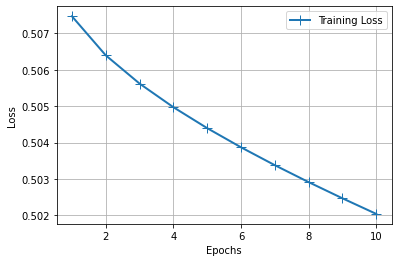

In [101]:
plot_loss(history.history)

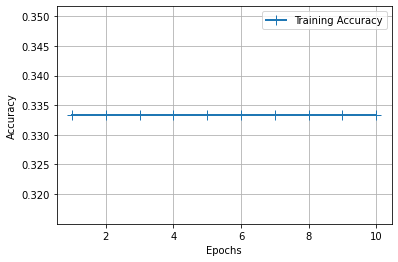

In [102]:
plot_acc(history.history)

In [103]:
loss, accuracy = model.evaluate(training_data, testing_data)

1/1 [==============================] - 0s 125ms/step - loss: 0.5016 - accuracy: 0.3333


In [104]:
model.predict(training_data)

array([[1.        ],
       [0.83180535],
       [0.1835081 ],
       [0.8907505 ],
       [0.20877737],
       [0.19614273]], dtype=float32)

## 2. Random data

In [175]:
X1, Y1 = make_blobs(n_features=2, centers=2, n_samples=10000, cluster_std=2)

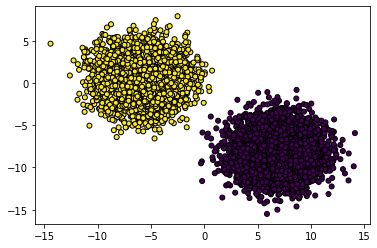

In [176]:
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.2, random_state=42
)

In [178]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [179]:
history = model.fit(X_train, y_train, epochs=epochs)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6996 - accuracy: 0.2396
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.3884
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.5844
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9015
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0089 - accuracy: 0.9893
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9974
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9980
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9985
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 9.7144e-04 - accuracy: 0.9987
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 8.3704e-04 - accuracy

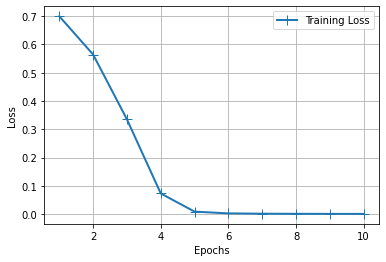

In [180]:
plot_loss(history.history)

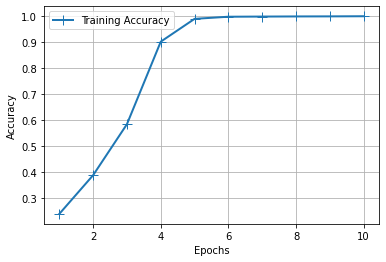

In [181]:
plot_acc(history.history)

In [182]:
loss, accuracy = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 7.1003e-04 - accuracy: 0.9995


# Deep learning

## Data

In [410]:
df = pd.read_csv('./datasets/rain/weatherAUS.csv', engine='python')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [411]:
df.columns=df.columns.str.strip().str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           145460 non-null  object 
 1   location       145460 non-null  object 
 2   mintemp        143975 non-null  float64
 3   maxtemp        144199 non-null  float64
 4   rainfall       142199 non-null  float64
 5   evaporation    82670 non-null   float64
 6   sunshine       75625 non-null   float64
 7   windgustdir    135134 non-null  object 
 8   windgustspeed  135197 non-null  float64
 9   winddir9am     134894 non-null  object 
 10  winddir3pm     141232 non-null  object 
 11  windspeed9am   143693 non-null  float64
 12  windspeed3pm   142398 non-null  float64
 13  humidity9am    142806 non-null  float64
 14  humidity3pm    140953 non-null  float64
 15  pressure9am    130395 non-null  float64
 16  pressure3pm    130432 non-null  float64
 17  cloud9am       89572 non-null

In [412]:
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['date',
 'location',
 'windgustdir',
 'winddir9am',
 'winddir3pm',
 'raintoday',
 'raintomorrow']

In [413]:
for cat in categorical:
    print(cat, ' contains ', len(df[cat].unique()), ' labels')

date  contains  3436  labels
location  contains  49  labels
windgustdir  contains  17  labels
winddir9am  contains  17  labels
winddir3pm  contains  17  labels
raintoday  contains  3  labels
raintomorrow  contains  3  labels


In [414]:
df[categorical].isnull().sum()

date                0
location            0
windgustdir     10326
winddir9am      10566
winddir3pm       4228
raintoday        3261
raintomorrow     3267
dtype: int64

In [415]:
df.dropna(subset=['raintomorrow'], inplace=True)

df['windgustdir'].fillna(df['windgustdir'].mode()[0], inplace=True)
df['winddir9am'].fillna(df['winddir9am'].mode()[0], inplace=True)
df['winddir3pm'].fillna(df['winddir3pm'].mode()[0], inplace=True)
df['raintoday'].fillna(df['raintoday'].mode()[0], inplace=True)

In [416]:
df[categorical].isnull().sum()

date            0
location        0
windgustdir     0
winddir9am      0
winddir3pm      0
raintoday       0
raintomorrow    0
dtype: int64

In [417]:
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm']

In [418]:
for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True)           

In [419]:
df[numerical].isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
dtype: int64

In [420]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.drop('date', axis=1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       142193 non-null  object 
 1   mintemp        142193 non-null  float64
 2   maxtemp        142193 non-null  float64
 3   rainfall       142193 non-null  float64
 4   evaporation    142193 non-null  float64
 5   sunshine       142193 non-null  float64
 6   windgustdir    142193 non-null  object 
 7   windgustspeed  142193 non-null  float64
 8   winddir9am     142193 non-null  object 
 9   winddir3pm     142193 non-null  object 
 10  windspeed9am   142193 non-null  float64
 11  windspeed3pm   142193 non-null  float64
 12  humidity9am    142193 non-null  float64
 13  humidity3pm    142193 non-null  float64
 14  pressure9am    142193 non-null  float64
 15  pressure3pm    142193 non-null  float64
 16  cloud9am       142193 non-null  float64
 17  cloud3pm       142193 non-nul

## Outliers

In [421]:
df.describe().T.style.background_gradient()

In [422]:
def get_upper_iqr(col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

    return df[col].quantile(0.75) + (IQR * 3)

In [423]:
rain_iqr = get_upper_iqr('rainfall')
df['rainfall'] = np.where(df['rainfall'] > rain_iqr, rain_iqr, df['rainfall'])

evap_iqr = get_upper_iqr('evaporation')
df['evaporation'] = np.where(df['evaporation'] > evap_iqr, evap_iqr, df['evaporation'])

wind9am_iqr = get_upper_iqr('windspeed9am')
df['windspeed9am'] = np.where(df['windspeed9am'] > wind9am_iqr, wind9am_iqr, df['windspeed9am'])

wind3pm_iqr = get_upper_iqr('windspeed3pm')
df['windspeed3pm'] = np.where(df['windspeed3pm'] > wind3pm_iqr, wind3pm_iqr, df['windspeed3pm'])

In [424]:
df.describe().T.style.background_gradient()

## Correlation

In [425]:
df.corr().style.background_gradient()

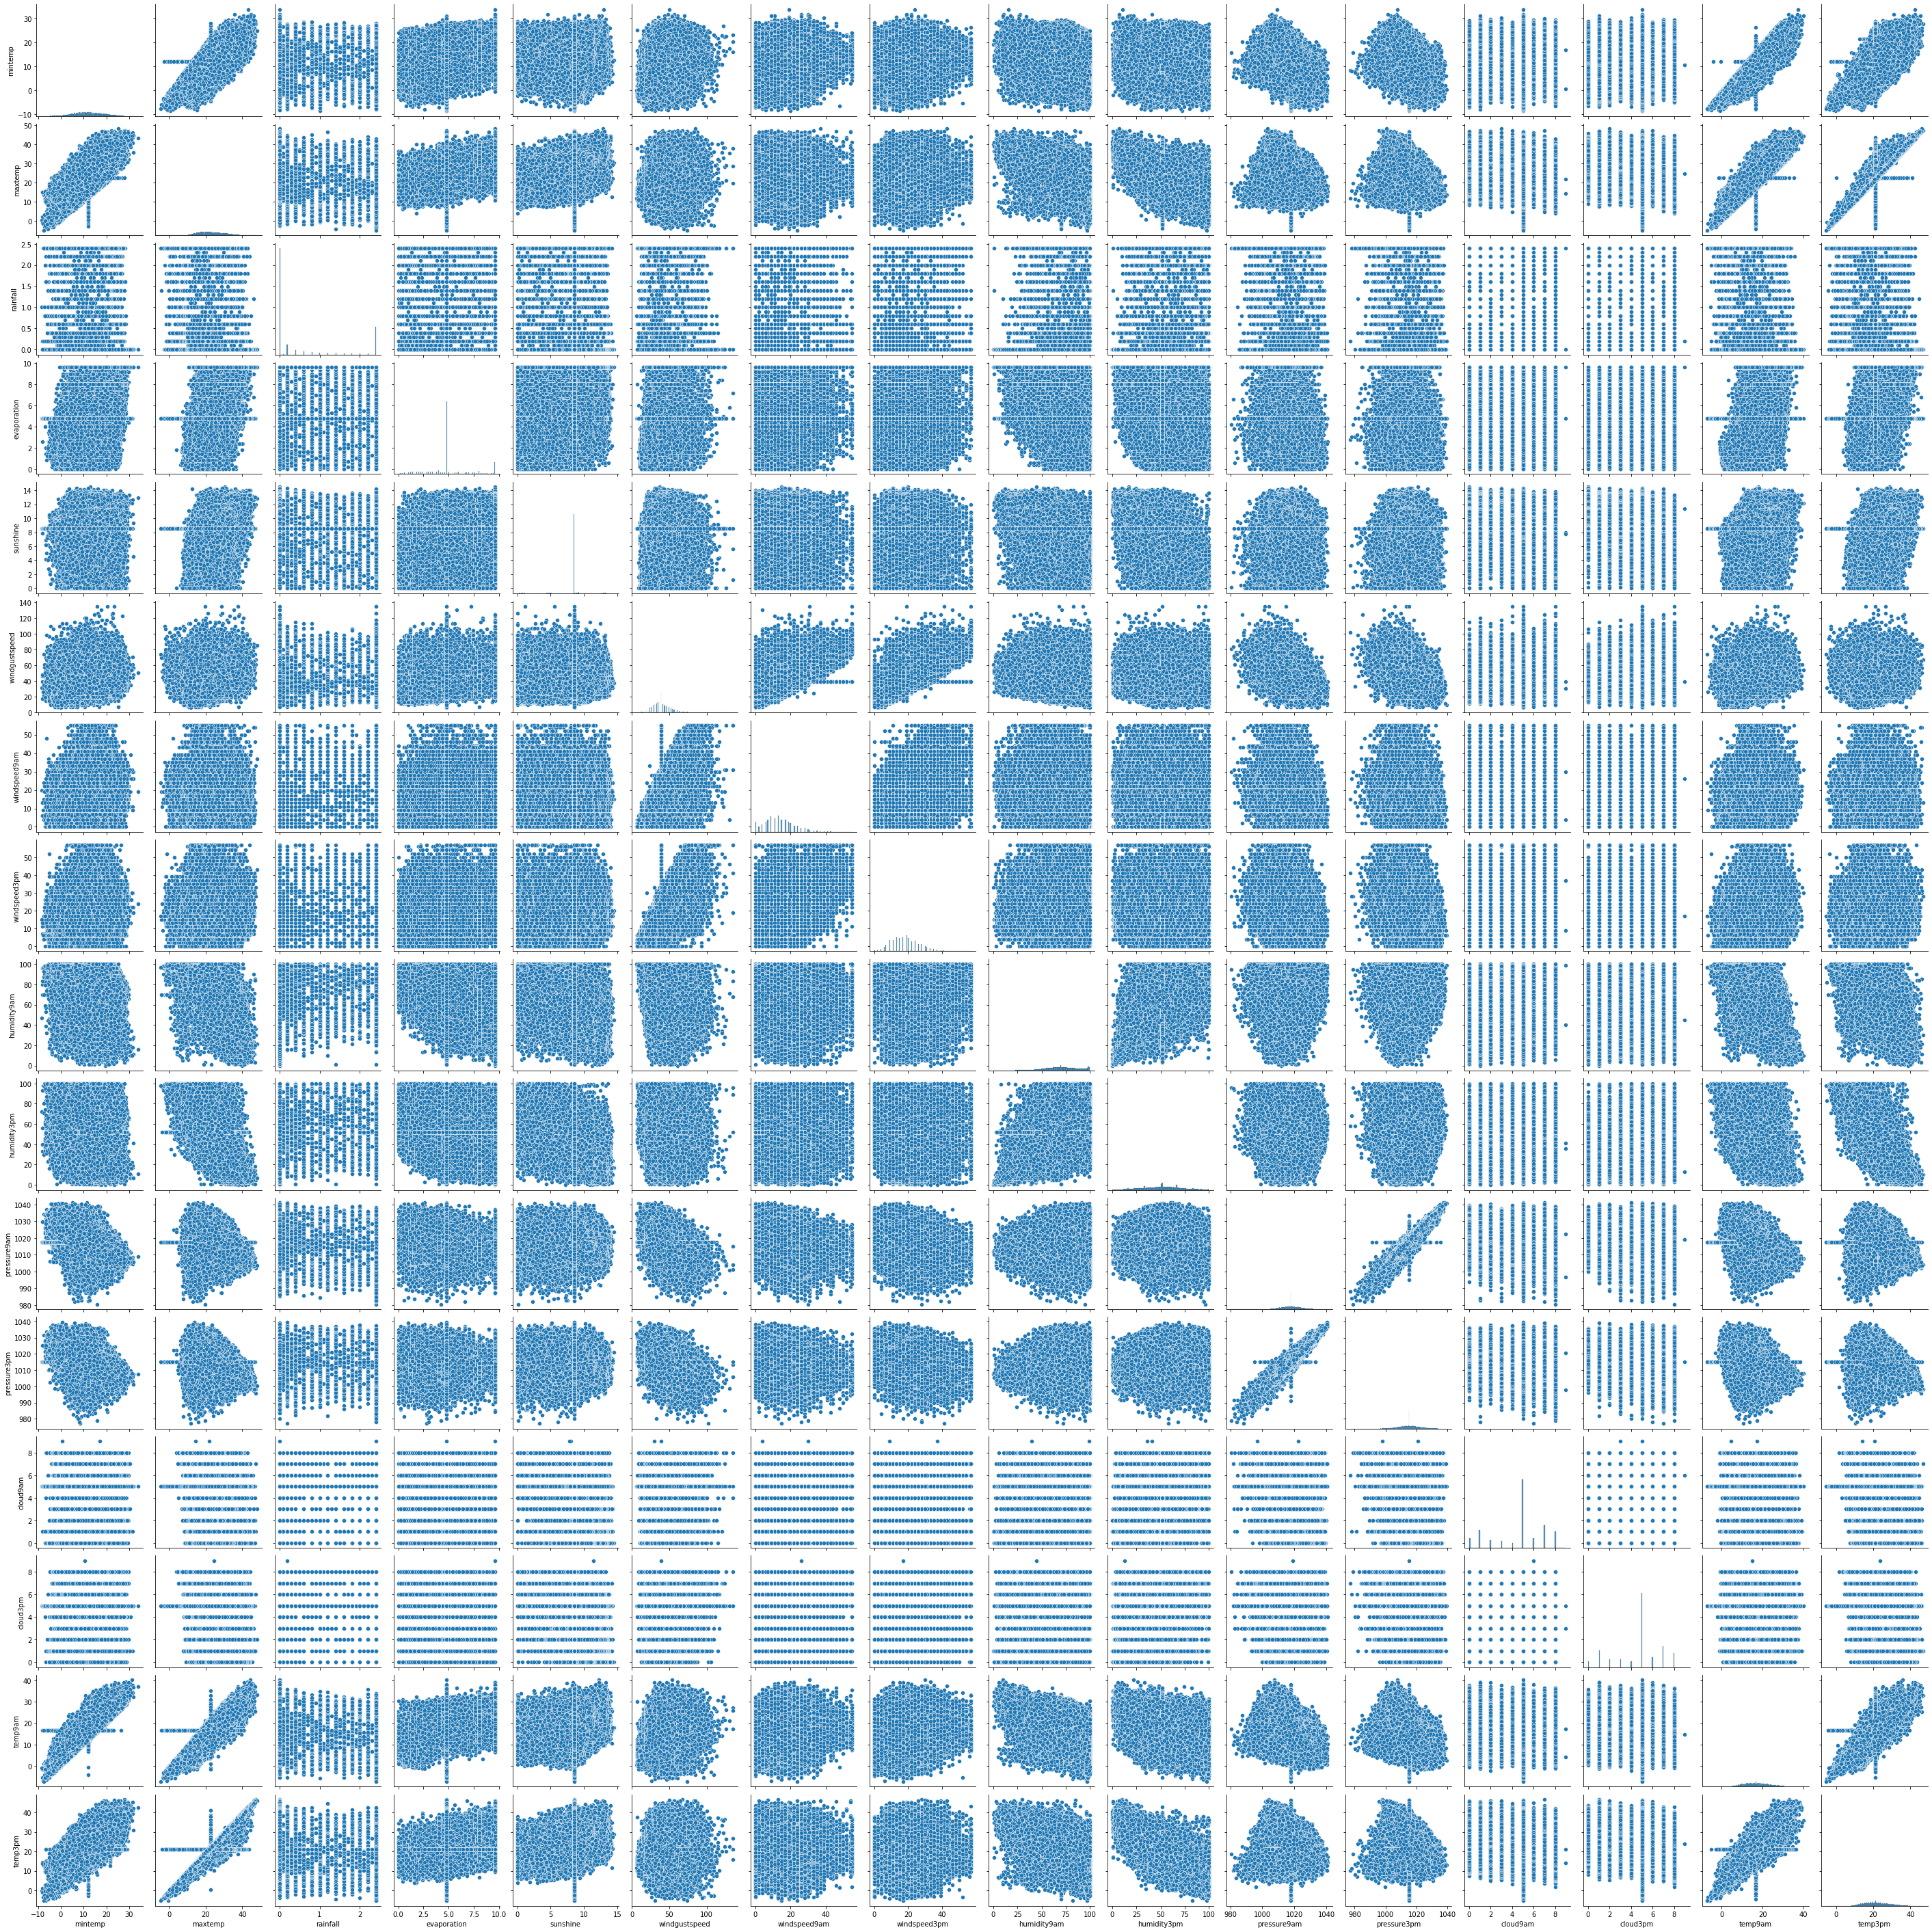

In [426]:
sns.pairplot(df[numerical], kind='scatter', diag_kind='hist', palette='Rainbow')

In [427]:
numerical

['mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm']

In [428]:
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['location',
 'windgustdir',
 'winddir9am',
 'winddir3pm',
 'raintoday',
 'raintomorrow']

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       142193 non-null  object 
 1   mintemp        142193 non-null  float64
 2   maxtemp        142193 non-null  float64
 3   rainfall       142193 non-null  float64
 4   evaporation    142193 non-null  float64
 5   sunshine       142193 non-null  float64
 6   windgustdir    142193 non-null  object 
 7   windgustspeed  142193 non-null  float64
 8   winddir9am     142193 non-null  object 
 9   winddir3pm     142193 non-null  object 
 10  windspeed9am   142193 non-null  float64
 11  windspeed3pm   142193 non-null  float64
 12  humidity9am    142193 non-null  float64
 13  humidity3pm    142193 non-null  float64
 14  pressure9am    142193 non-null  float64
 15  pressure3pm    142193 non-null  float64
 16  cloud9am       142193 non-null  float64
 17  cloud3pm       142193 non-nul

## One hot encoding

In [430]:
df = pd.get_dummies(df, columns=['location'])
df = pd.get_dummies(df, columns=['windgustdir'])
df = pd.get_dummies(df, columns=['winddir9am'])
df = pd.get_dummies(df, columns=['winddir3pm'])
df = pd.get_dummies(df, columns=['raintoday'])
df.head()

mintemp  maxtemp  rainfall  evaporation  sunshine  windgustspeed  \
0     13.4     22.9       0.6          4.8       8.5           44.0   
1      7.4     25.1       0.0          4.8       8.5           44.0   
2     12.9     25.7       0.0          4.8       8.5           46.0   
3      9.2     28.0       0.0          4.8       8.5           24.0   
4     17.5     32.3       1.0          4.8       8.5           41.0   

   windspeed9am  windspeed3pm  humidity9am  humidity3pm  ...  winddir3pm_S  \
0          20.0          24.0         71.0         22.0  ...             0   
1           4.0          22.0         44.0         25.0  ...             0   
2          19.0          26.0         38.0         30.0  ...             0   
3          11.0           9.0         45.0         16.0  ...             0   
4           7.0          20.0         82.0         33.0  ...             0   

   winddir3pm_SE  winddir3pm_SSE  winddir3pm_SSW  winddir3pm_SW  winddir3pm_W  \
0              0               0               0              0             0   
1              0               0               0              0             0   
2              0               0               0              0             0   
3              0               0               0              0             0   
4              0               0               0              0             0   

  winddir3pm_WNW  winddir3pm_WSW  raintoday_No  raintoday_Yes  
0              1               0             1              0  
1              0               1             1              0  
2              0               1             1              0  
3              0               0             1              0  
4              0               0             1              0  

[5 rows x 119 columns]

In [431]:
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm',
 'year',
 'month',
 'day',
 'location_Adelaide',
 'location_Albany',
 'location_Albury',
 'location_AliceSprings',
 'location_BadgerysCreek',
 'location_Ballarat',
 'location_Bendigo',
 'location_Brisbane',
 'location_Cairns',
 'location_Canberra',
 'location_Cobar',
 'location_CoffsHarbour',
 'location_Dartmoor',
 'location_Darwin',
 'location_GoldCoast',
 'location_Hobart',
 'location_Katherine',
 'location_Launceston',
 'location_Melbourne',
 'location_MelbourneAirport',
 'location_Mildura',
 'location_Moree',
 'location_MountGambier',
 'location_MountGinini',
 'location_Newcastle',
 'location_Nhil',
 'location_NorahHead',
 'location_NorfolkIsland',
 'location_Nuriootpa',
 'location_PearceRAAF',
 'location_Penrith',
 'location_Perth',
 'location_PerthAirp

## Training data

In [432]:
X = df.drop(['raintomorrow'], axis=1)

In [433]:
X

mintemp  maxtemp  rainfall  evaporation  sunshine  windgustspeed  \
0          13.4     22.9       0.6          4.8       8.5           44.0   
1           7.4     25.1       0.0          4.8       8.5           44.0   
2          12.9     25.7       0.0          4.8       8.5           46.0   
3           9.2     28.0       0.0          4.8       8.5           24.0   
4          17.5     32.3       1.0          4.8       8.5           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0          4.8       8.5           31.0   
145455      2.8     23.4       0.0          4.8       8.5           31.0   
145456      3.6     25.3       0.0          4.8       8.5           22.0   
145457      5.4     26.9       0.0          4.8       8.5           37.0   
145458      7.8     27.0       0.0          4.8       8.5           28.0   

        windspeed9am  windspeed3pm  humidity9am  humidity3pm  ...  \
0               20.0          24.0         71.0         22.0  ...   
1                4.0          22.0         44.0         25.0  ...   
2               19.0          26.0         38.0         30.0  ...   
3               11.0           9.0         45.0         16.0  ...   
4                7.0          20.0         82.0         33.0  ...   
...              ...           ...          ...          ...  ...   
145454          15.0          13.0         59.0         27.0  ...   
145455          13.0          11.0         51.0         24.0  ...   
145456          13.0           9.0         56.0         21.0  ...   
145457           9.0           9.0         53.0         24.0  ...   
145458          13.0           7.0         51.0         24.0  ...   

        winddir3pm_S  winddir3pm_SE  winddir3pm_SSE  winddir3pm_SSW  \
0                  0              0               0               0   
1                  0              0               0               0   
2                  0              0               0               0   
3                  0              0               0               0   
4                  0              0               0               0   
...              ...            ...             ...             ...   
145454             0              0               0               0   
145455             0              0               0               0   
145456             0              0               0               0   
145457             0              0               0               0   
145458             0              0               0               0   

        winddir3pm_SW  winddir3pm_W  winddir3pm_WNW  winddir3pm_WSW  \
0                   0             0               1               0   
1                   0             0               0               1   
2                   0             0               0               1   
3                   0             0               0               0   
4                   0             0               0               0   
...               ...           ...             ...             ...   
145454              0             0               0               0   
145455              0             0               0               0   
145456              0             0               0               0   
145457              0             0               1               0   
145458              0             0               0               0   

        raintoday_No  raintoday_Yes  
0                  1              0  
1                  1              0  
2                  1              0  
3                  1              0  
4                  1              0  
...              ...            ...  
145454             1              0  
145455             1              0  
145456             1              0  
145457             1              0  
145458             1              0  

[142193 rows x 118 columns]

In [434]:
y = df['raintomorrow']
y.value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: raintomorrow, dtype: float64

In [435]:
y = y.eq('Yes').mul(1)
y.value_counts()/len(df)

0    0.775819
1    0.224181
Name: raintomorrow, dtype: float64

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [437]:
scaler = MinMaxScaler()
cols = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])

In [438]:
X_train.describe()

mintemp        maxtemp       rainfall    evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.484406       0.530004       0.229201       0.513717   
std         0.151741       0.134105       0.385666       0.222937   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.375297       0.431002       0.000000       0.416667   
50%         0.479810       0.517958       0.000000       0.500000   
75%         0.593824       0.623819       0.250000       0.562500   
max         1.000000       1.000000       1.000000       1.000000   

            sunshine  windgustspeed   windspeed9am   windspeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.554562       0.262667       0.254148       0.326575   
std         0.190999       0.101682       0.160119       0.152384   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.565517       0.193798       0.127273       0.228070   
50%         0.586207       0.255814       0.236364       0.333333   
75%         0.600000       0.310078       0.345455       0.421053   
max         1.000000       1.000000       1.000000       1.000000   

         humidity9am    humidity3pm  ...   winddir3pm_S  winddir3pm_SE  \
count  113754.000000  113754.000000  ...  113754.000000  113754.000000   
mean        0.688675       0.515095  ...       0.067259       0.101605   
std         0.189356       0.205307  ...       0.250471       0.302130   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.570000       0.370000  ...       0.000000       0.000000   
50%         0.700000       0.520000  ...       0.000000       0.000000   
75%         0.830000       0.650000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

      winddir3pm_SSE winddir3pm_SSW  winddir3pm_SW   winddir3pm_W  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.064059       0.056402       0.064464       0.069334   
std         0.244860       0.230698       0.245578       0.254022   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

      winddir3pm_WNW winddir3pm_WSW   raintoday_No  raintoday_Yes  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.060798       0.065483       0.778988       0.221012  
std         0.238960       0.247378       0.414930       0.414930  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       1.000000       0.000000  
50%         0.000000       0.000000       1.000000       0.000000  
75%         0.000000       0.000000       1.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 118 columns]

In [439]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113754 entries, 0 to 113753
Columns: 118 entries, ('mintemp',) to ('raintoday_Yes',)
dtypes: float64(118)
memory usage: 102.4 MB


## Neural network

In [447]:
epochs = 50
batch_size = 256
input_shape = (len(X_train.columns),)

In [465]:
model = models.Sequential()

model.add(Dense(16, activation = 'relu', input_shape=input_shape))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 16)                1904      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 17        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [466]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [467]:
earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

history = model.fit(
        x=X_train,
        y=y_train, 
        validation_data=(X_test, y_test),
        epochs=epochs, 
        batch_size=batch_size, 
        callbacks=[earlystop])

Epoch 1/50
445/445 [==============================] - 2s 5ms/step - loss: 0.5938 - accuracy: 0.7150 - val_loss: 0.5028 - val_accuracy: 0.7764
Epoch 2/50
445/445 [==============================] - 2s 4ms/step - loss: 0.5080 - accuracy: 0.7779 - val_loss: 0.4719 - val_accuracy: 0.7843
Epoch 3/50
445/445 [==============================] - 2s 4ms/step - loss: 0.4835 - accuracy: 0.7833 - val_loss: 0.4540 - val_accuracy: 0.7956
Epoch 4/50
445/445 [==============================] - 2s 4ms/step - loss: 0.4667 - accuracy: 0.7897 - val_loss: 0.4411 - val_accuracy: 0.8021
Epoch 5/50
445/445 [==============================] - 2s 4ms/step - loss: 0.4533 - accuracy: 0.7948 - val_loss: 0.4306 - val_accuracy: 0.8078
Epoch 6/50
445/445 [==============================] - 2s 4ms/step - loss: 0.4445 - accuracy: 0.7986 - val_loss: 0.4219 - val_accuracy: 0.8108
Epoch 7/50
445/445 [==============================] - 2s 4ms/step - loss: 0.4357 - accuracy: 0.8028 - val_loss: 0.4143 - val_accuracy: 0.8141
Epoch 

In [468]:
def plot_loss(his):
    loss_values = his['loss']
    val_loss_values = his['val_loss']
    epochs = range(1, len(loss_values) + 1)

    line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
    line2 = plt.plot(epochs, loss_values, label='Training Loss')
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def plot_acc(his):
    acc_values = his['accuracy']
    acc_loss_values = his['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    line1 = plt.plot(epochs, acc_loss_values, label='Validation/Test Accuracy')
    line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

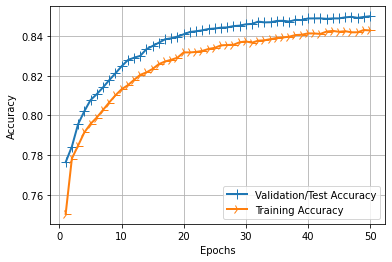

In [469]:
plot_acc(history.history)

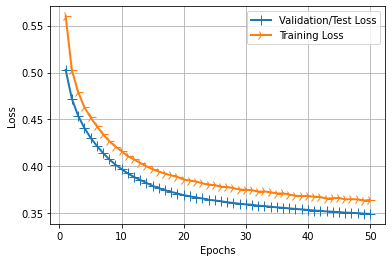

In [470]:
plot_loss(history.history)

In [471]:
loss, accuracy = model.evaluate(X_test, y_test)

889/889 [==============================] - 2s 2ms/step - loss: 0.3492 - accuracy: 0.8501
